In [2]:
import pandas as pd

data = pd.read_csv('covid_data2.csv',index_col='date',parse_dates=True)
# data2= data[data['location']== 'New Zealand']

In [3]:
data['total_deaths_per_hundred']= data['total_deaths_per_million']*10000

In [4]:
data.head(60)# data=data.sort_values('date')

,iso_code,continent,location,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,total_deaths_per_hundred
date,,,,,,,,,,,,,,,,,,,,,
2020-03-23,AFG,Asia,Afghanistan,40.0,6.0,1.0,1.0,0.998,0.000006,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-24,AFG,Asia,Afghanistan,42.0,2.0,1.0,0.0,1.047,0.000002,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-25,AFG,Asia,Afghanistan,74.0,32.0,1.0,0.0,1.845,0.000032,0.000001,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.01
2020-03-26,AFG,Asia,Afghanistan,80.0,6.0,2.0,1.0,1.995,0.000006,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-27,AFG,Asia,Afghanistan,91.0,11.0,2.0,0.0,2.269,0.000011,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-28,AFG,Asia,Afghanistan,106.0,15.0,2.0,0.0,2.643,0.000015,0.000002,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.02
2020-03-29,AFG,Asia,Afghanistan,114.0,8.0,4.0,2.0,2.843,0.000008,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-30,AFG,Asia,Afghanistan,114.0,0.0,4.0,0.0,2.843,0.000000,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04
2020-03-31,AFG,Asia,Afghanistan,166.0,52.0,4.0,0.0,4.140,0.000052,0.000004,...,597.029,9.59,6.2,31.2,37.746,0.5,64.83,0.511,41128772.0,0.04


In [5]:
 df=data[['iso_code','location','total_deaths_per_hundred']]

In [6]:
# df['country']= (df['location'],inplace=True)



df.rename(columns={ 'location' :'country'}, inplace=True)

C:\Users\Yuga 14\AppData\Local\Temp\ipykernel_12968\3292964113.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={ 'location' :'country'}, inplace=True)


In [7]:
df

,iso_code,country,total_deaths_per_hundred
date,,,
2020-03-23,AFG,Afghanistan,0.01
2020-03-24,AFG,Afghanistan,0.01
2020-03-25,AFG,Afghanistan,0.01
2020-03-26,AFG,Afghanistan,0.02
2020-03-27,AFG,Afghanistan,0.02
...,...,...,...
2022-10-23,ZWE,Zimbabwe,56.06
2022-10-24,ZWE,Zimbabwe,56.06
2022-10-25,ZWE,Zimbabwe,56.06


In [8]:
#Create new columns based on distinct values and count them
df = df.sort_values('country')
df['cid'] = (df.groupby(['country']).cumcount()==0).astype(int)
 
df['cid'] = df['cid'].cumsum()

In [9]:
pdf=df.loc[df['cid'] == 158]
spdf = pdf.sort_values('total_deaths_per_hundred')
spdf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-03-17,PRT,Portugal,0.01,158
2020-03-18,PRT,Portugal,0.02,158
2020-03-19,PRT,Portugal,0.03,158
2020-03-20,PRT,Portugal,0.06,158
2020-03-21,PRT,Portugal,0.12,158
...,...,...,...,...
2022-10-23,PRT,Portugal,251.28,158
2022-10-24,PRT,Portugal,251.28,158
2022-10-20,PRT,Portugal,251.28,158


In [10]:
val = spdf['total_deaths_per_hundred'].values

In [11]:
val

array([1.0000e-02, 2.0000e-02, 3.0000e-02, 6.0000e-02, 1.2000e-01,
       1.4000e-01, 2.3000e-01, 3.3000e-01, 4.3000e-01, 6.0000e-01,
       7.6000e-01, 1.0000e+00, 1.1900e+00, 1.4000e+00, 1.6000e+00,
       1.8700e+00, 2.0900e+00, 2.4600e+00, 2.6600e+00, 2.9500e+00,
       3.1100e+00, 3.4500e+00, 3.8000e+00, 4.0900e+00, 4.3500e+00,
       4.7000e+00, 5.0400e+00, 5.3500e+00, 5.6700e+00, 5.9900e+00,
       6.2900e+00, 6.5700e+00, 6.8700e+00, 7.1400e+00, 7.3500e+00,
       7.6200e+00, 7.8500e+00, 8.2000e+00, 8.5400e+00, 8.8000e+00,
       9.0300e+00, 9.2800e+00, 9.4800e+00, 9.7300e+00, 9.8900e+00,
       1.0070e+01, 1.0430e+01, 1.0630e+01, 1.0740e+01, 1.0890e+01,
       1.1050e+01, 1.1140e+01, 1.1260e+01, 1.1350e+01, 1.1440e+01,
       1.1630e+01, 1.1750e+01, 1.1840e+01, 1.1900e+01, 1.2030e+01,
       1.2180e+01, 1.2310e+01, 1.2470e+01, 1.2630e+01, 1.2770e+01,
       1.2890e+01, 1.3020e+01, 1.3160e+01, 1.3300e+01, 1.3420e+01,
       1.3560e+01, 1.3690e+01, 1.3830e+01, 1.3960e+01, 1.4100e

In [12]:
train, test = val[:-60],  val[-60:]

In [13]:
test

array([248.13, 248.39, 248.45, 248.55, 248.57, 248.65, 248.65, 248.65,
       248.86, 248.93, 248.99, 249.05, 249.09, 249.09, 249.09, 249.24,
       249.31, 249.42, 249.47, 249.51, 249.51, 249.51, 249.66, 249.7 ,
       249.72, 249.84, 249.91, 249.91, 249.91, 250.08, 250.12, 250.17,
       250.24, 250.31, 250.31, 250.31, 250.58, 250.63, 250.7 , 250.75,
       250.75, 250.75, 250.75, 250.87, 251.06, 251.14, 251.19, 251.25,
       251.25, 251.25, 251.25, 251.28, 251.28, 251.28, 251.28, 251.28,
       251.28, 251.28, 252.03, 252.09])

In [14]:
test.shape

(60,)

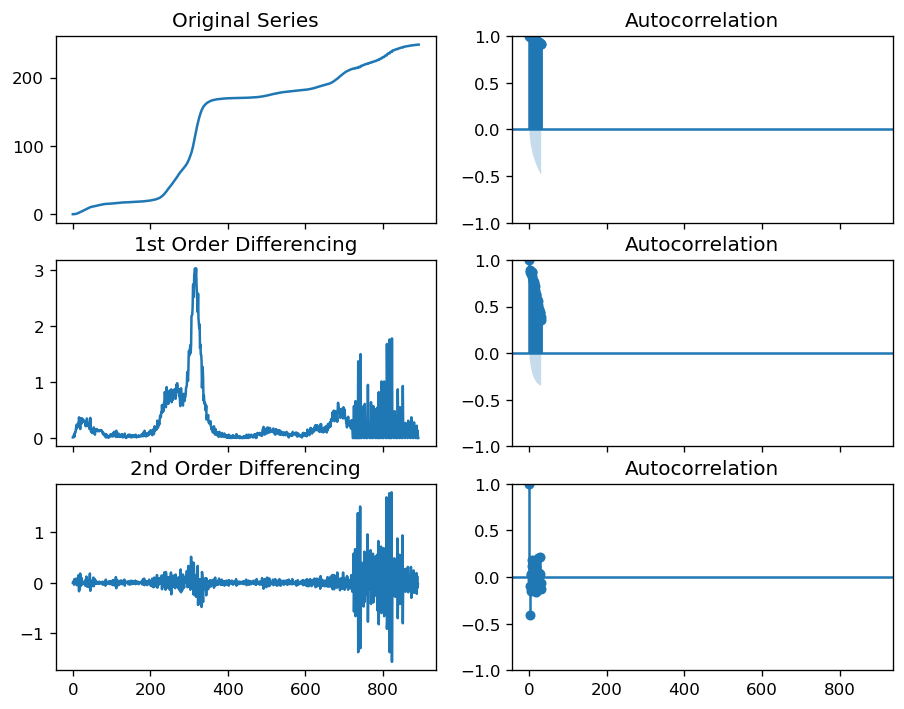

In [15]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(train); axes[0, 0].set_title('Original Series')
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(np.diff(train)); axes[1, 0].set_title('1st Order Differencing')
plot_acf(np.diff(train), ax=axes[1, 1])
difftrain = np.diff(train)

# 2nd Differencing
axes[2, 0].plot(np.diff(difftrain)); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(np.diff(difftrain), ax=axes[2, 1])
plt.show()

In [16]:
# !pip install pmdarima

In [17]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model = pm.auto_arima(train, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-462.685, Time=0.51 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-155.857, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-316.936, Time=0.22 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-464.620, Time=0.29 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-157.857, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-462.714, Time=0.51 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-463.101, Time=0.87 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=-466.620, Time=0.16 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=-464.685, Time=0.21 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-464.714, Time=0.32 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=-318.936, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-465.101, Time=0.54 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 4.002 seconds
                               SARIMAX Results                                
Dep. Vari

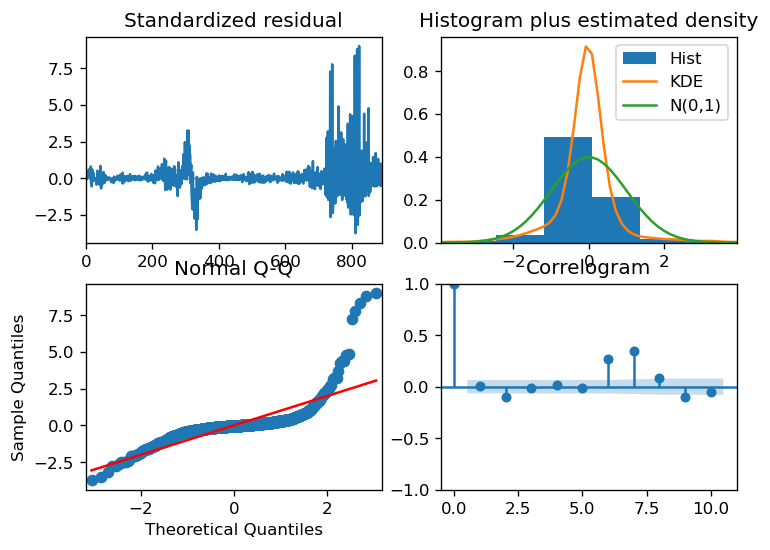

In [18]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

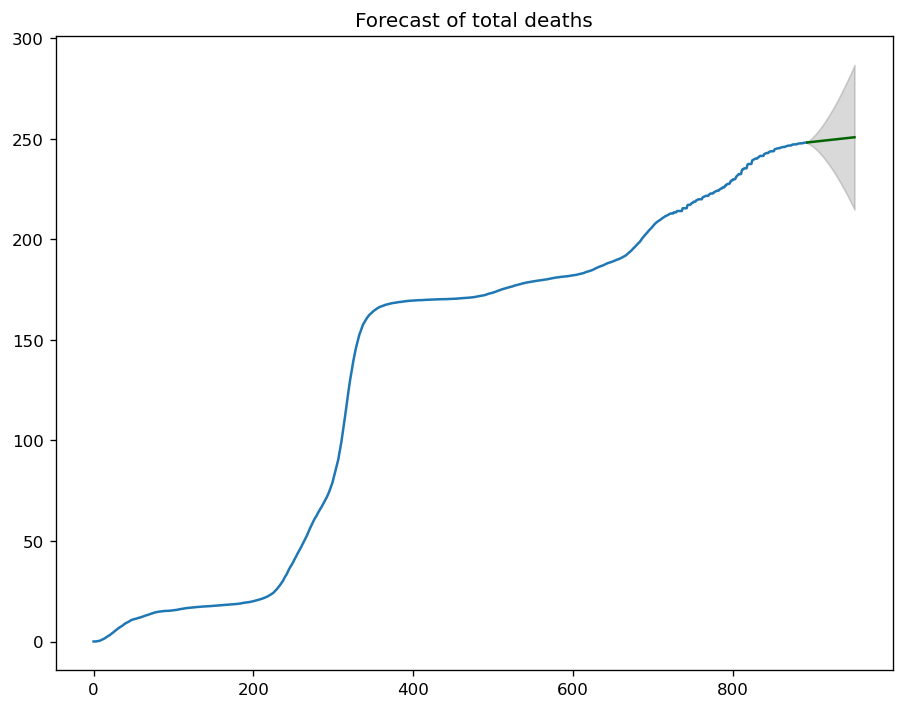

In [19]:
# Forecast
n_periods = 60
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train), len(train)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [20]:
print(fc_series)

893    248.173695
894    248.217389
895    248.261084
896    248.304779
897    248.348473
898    248.392168
899    248.435862
900    248.479557
901    248.523252
902    248.566946
903    248.610641
904    248.654336
905    248.698030
906    248.741725
907    248.785420
908    248.829114
909    248.872809
910    248.916504
911    248.960198
912    249.003893
913    249.047587
914    249.091282
915    249.134977
916    249.178671
917    249.222366
918    249.266061
919    249.309755
920    249.353450
921    249.397145
922    249.440839
923    249.484534
924    249.528228
925    249.571923
926    249.615618
927    249.659312
928    249.703007
929    249.746702
930    249.790396
931    249.834091
932    249.877786
933    249.921480
934    249.965175
935    250.008870
936    250.052564
937    250.096259
938    250.139953
939    250.183648
940    250.227343
941    250.271037
942    250.314732
943    250.358427
944    250.402121
945    250.445816
946    250.489511
947    250.533205
948    250

In [21]:
accuracy=pd.DataFrame({'observed':test, 'predicted':fc_series})

In [22]:
accuracy['diff']= accuracy['predicted']-accuracy['observed'] 

In [23]:
accuracy['country']='Portugal' 

In [24]:
accuracy

,observed,predicted,diff,country
893,248.13,248.173695,0.043695,Portugal
894,248.39,248.217389,-0.172611,Portugal
895,248.45,248.261084,-0.188916,Portugal
896,248.55,248.304779,-0.245221,Portugal
897,248.57,248.348473,-0.221527,Portugal
898,248.65,248.392168,-0.257832,Portugal
899,248.65,248.435862,-0.214138,Portugal
900,248.65,248.479557,-0.170443,Portugal
901,248.86,248.523252,-0.336748,Portugal
902,248.93,248.566946,-0.363054,Portugal


In [25]:
ldf=df.loc[df['cid'] == 115]
sldf = ldf.sort_values('total_deaths_per_hundred')
sldf

,iso_code,country,total_deaths_per_hundred,cid
date,,,,
2020-03-14,LUX,Luxembourg,0.01,115
2020-03-16,LUX,Luxembourg,0.01,115
2020-03-17,LUX,Luxembourg,0.01,115
2020-03-15,LUX,Luxembourg,0.01,115
2020-03-18,LUX,Luxembourg,0.02,115
...,...,...,...,...
2022-10-24,LUX,Luxembourg,11.39,115
2022-10-18,LUX,Luxembourg,11.40,115
2022-10-25,LUX,Luxembourg,11.44,115


In [26]:
val1 = sldf['total_deaths_per_hundred'].values

In [27]:
train1, test1 = val1[:-60],  val1[-60:]

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model1 = pm.auto_arima(train1, start_p=1, start_q=1,
test='adf', # use adftest to find optimal 'd'
max_p=3, max_q=3, # maximum p and q
m=1, # frequency of series
d=None, # let model determine 'd'
seasonal=False, # No Seasonality
start_P=0,
D=0,
trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-4066.145, Time=0.35 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-3541.389, Time=0.13 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-3721.336, Time=0.49 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-4141.079, Time=0.75 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-3543.389, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-4146.416, Time=1.09 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=-4166.457, Time=1.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-4194.366, Time=1.44 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-3926.011, Time=0.20 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=-4192.163, Time=1.49 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-4023.138, Time=0.19 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=-4190.963, Time=2.13 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=-4196.344, Time=0.58 sec
 ARIMA(1,2,1)(0,0,0)[0]  

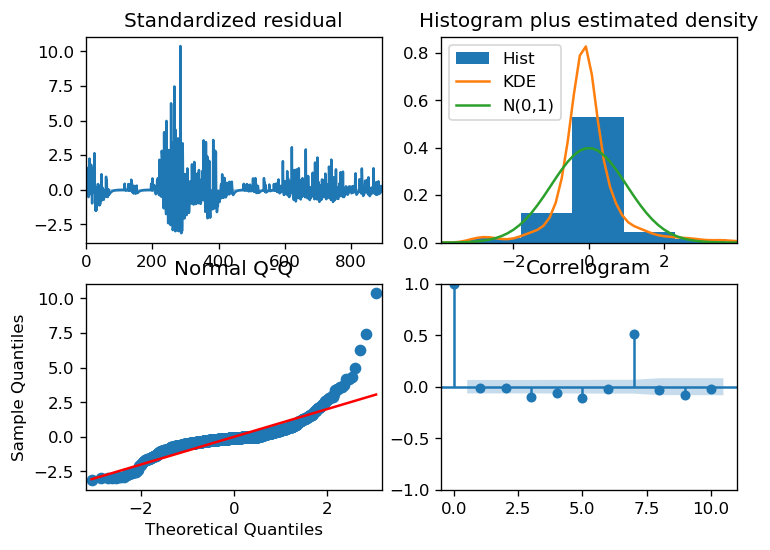

In [29]:
model1.plot_diagnostics(figsize=(7,5))
plt.show()

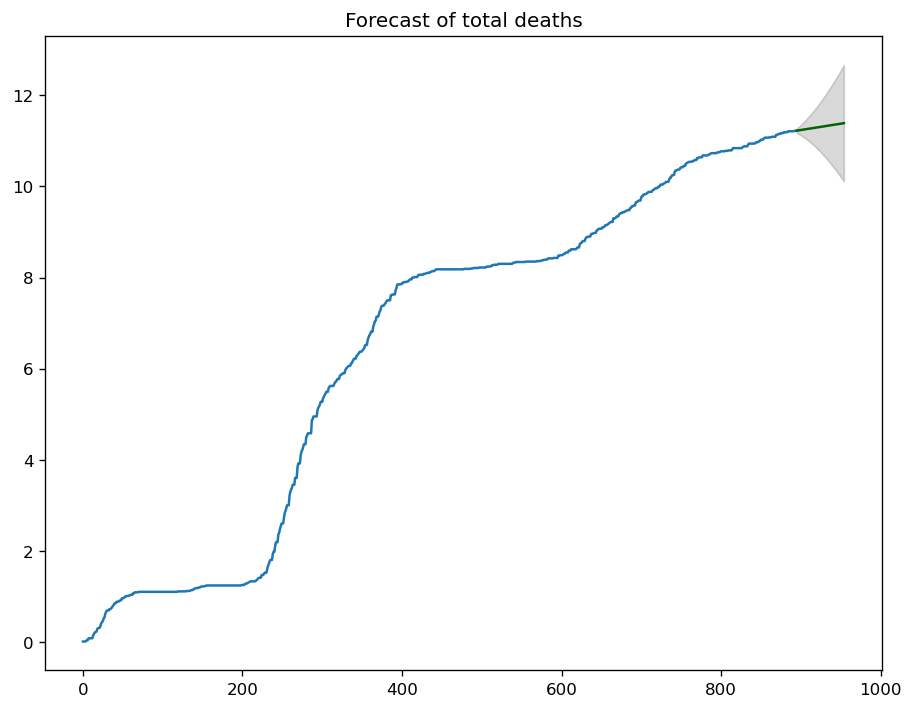

In [30]:
# Forecast
n_periods = 60
fc, confint = model1.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(train1), len(train1)+n_periods)

# make series for plotting purpose
fc_series1 = pd.Series(fc, index=index_of_fc)
lower_series1 = pd.Series(confint[:, 0], index=index_of_fc)
upper_series1 = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(train1)
plt.plot(fc_series1, color='darkgreen')
plt.fill_between(lower_series1.index,
lower_series1,
upper_series1,
color='k', alpha=.15)
plt.title("Forecast of total deaths")
plt.show()

In [31]:
print(fc_series1)

895    11.223810
896    11.227168
897    11.229611
898    11.232277
899    11.235149
900    11.237940
901    11.240688
902    11.243462
903    11.246244
904    11.249018
905    11.251792
906    11.254567
907    11.257342
908    11.260117
909    11.262892
910    11.265667
911    11.268442
912    11.271216
913    11.273991
914    11.276766
915    11.279541
916    11.282316
917    11.285091
918    11.287866
919    11.290641
920    11.293416
921    11.296191
922    11.298966
923    11.301740
924    11.304515
925    11.307290
926    11.310065
927    11.312840
928    11.315615
929    11.318390
930    11.321165
931    11.323940
932    11.326715
933    11.329489
934    11.332264
935    11.335039
936    11.337814
937    11.340589
938    11.343364
939    11.346139
940    11.348914
941    11.351689
942    11.354464
943    11.357239
944    11.360013
945    11.362788
946    11.365563
947    11.368338
948    11.371113
949    11.373888
950    11.376663
951    11.379438
952    11.382213
953    11.3849

In [32]:
accuracy2=pd.DataFrame({'observed':test1, 'predicted':fc_series1})

In [33]:
accuracy2['diff']= accuracy2['predicted']-accuracy2['observed'] 

In [37]:
accuracy2['country']='Luxembourg'

In [38]:
accuracy2

,observed,predicted,diff,country
895,11.22,11.223810,0.003810,Luxembourg
896,11.22,11.227168,0.007168,Luxembourg
897,11.23,11.229611,-0.000389,Luxembourg
898,11.23,11.232277,0.002277,Luxembourg
899,11.23,11.235149,0.005149,Luxembourg
900,11.23,11.237940,0.007940,Luxembourg
901,11.23,11.240688,0.010688,Luxembourg
902,11.23,11.243462,0.013462,Luxembourg
903,11.23,11.246244,0.016244,Luxembourg
904,11.23,11.249018,0.019018,Luxembourg


In [39]:
po_lu= pd.concat([accuracy2,accuracy],ignore_index=True)

In [40]:
po_lu

,observed,predicted,diff,country
0,11.22,11.223810,0.003810,Luxembourg
1,11.22,11.227168,0.007168,Luxembourg
2,11.23,11.229611,-0.000389,Luxembourg
3,11.23,11.232277,0.002277,Luxembourg
4,11.23,11.235149,0.005149,Luxembourg
...,...,...,...,...
115,251.28,250.576900,-0.703100,Portugal
116,251.28,250.620594,-0.659406,Portugal
117,251.28,250.664289,-0.615711,Portugal
118,252.03,250.707984,-1.322016,Portugal


In [41]:
po_lu.to_csv("C:/Users/Yuga 14/Desktop/final project/crona/covid_po_lu.csv", index=False)